In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [17]:
def load_img():
    img = np.zeros(shape=(600,600))
    cv2.putText(img, text='ABCD', org=(50,300), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=5, color=(255,255,255), thickness=20)
    return img

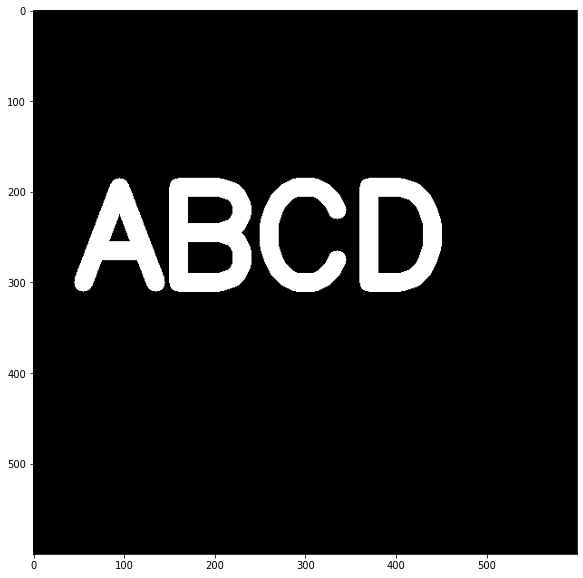

In [18]:
img = load_img()
display_img(img)

## Erode

In [19]:
kernel = np.ones(shape=(5,5), dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

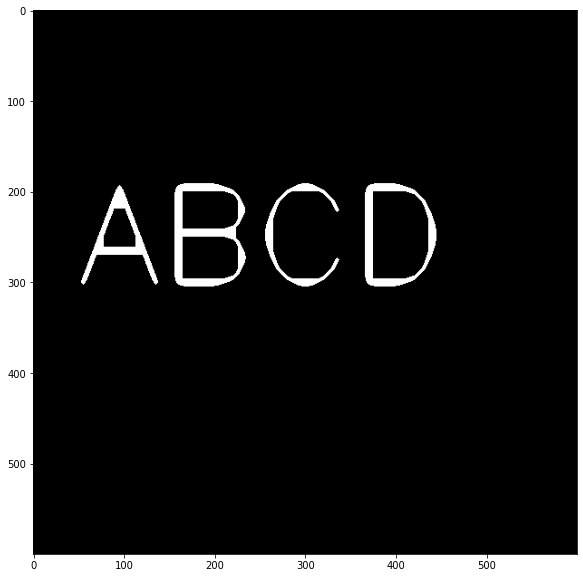

In [21]:
ero = cv2.erode(img, kernel=kernel, iterations=3)
display_img(ero)

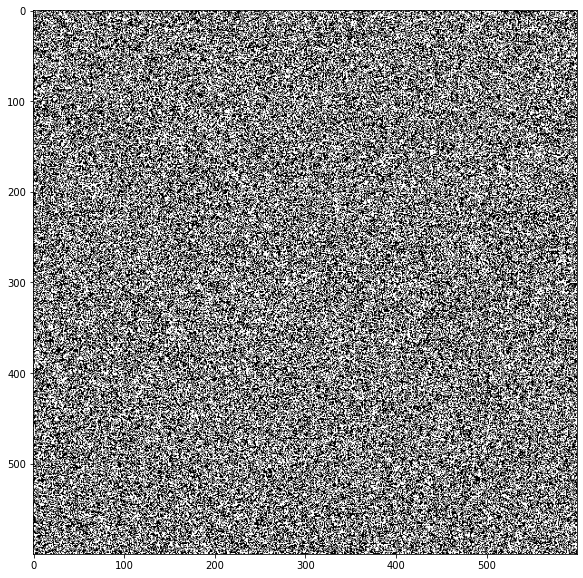

In [24]:
white_noise = np.random.randint(low=0, high=2, size=(600,600), dtype=np.uint8)
display_img(white_noise)

In [26]:
white_noise *= 255
white_noise

array([[  0,   0, 255, ...,   0,   0, 255],
       [255, 255,   0, ..., 255, 255,   0],
       [  0,   0,   0, ...,   0, 255, 255],
       ...,
       [  0, 255, 255, ..., 255,   0,   0],
       [255, 255,   0, ...,   0, 255,   0],
       [  0, 255,   0, ...,   0,   0,   0]], dtype=uint8)

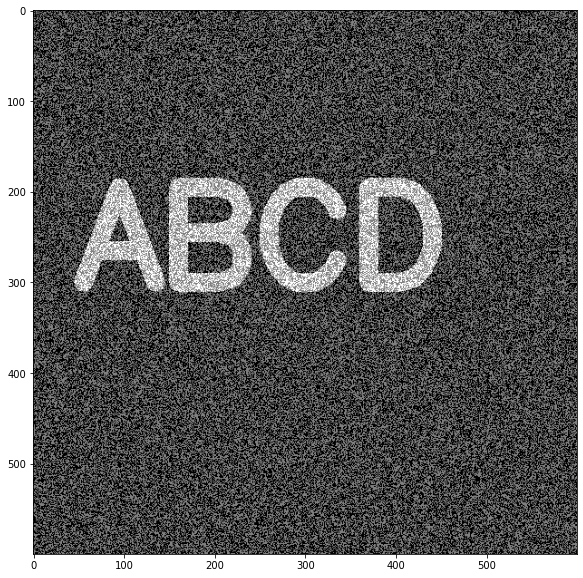

In [27]:
noise_img = white_noise + img
display_img(noise_img)

## Open Morphology

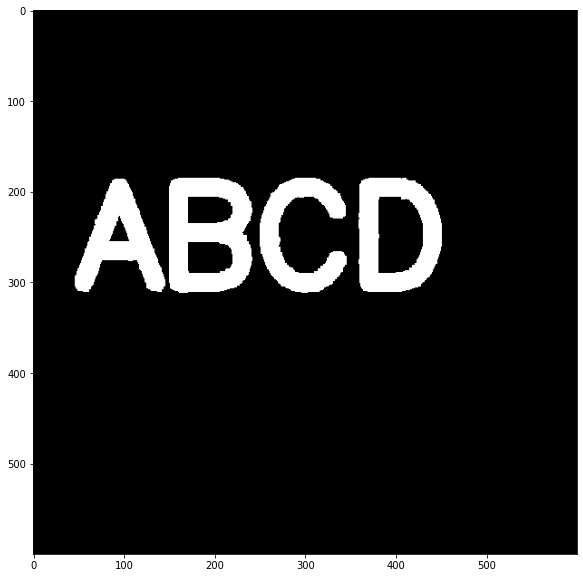

In [29]:
mor = cv2.morphologyEx(noise_img, op=cv2.MORPH_OPEN, kernel=kernel)
display_img(mor)

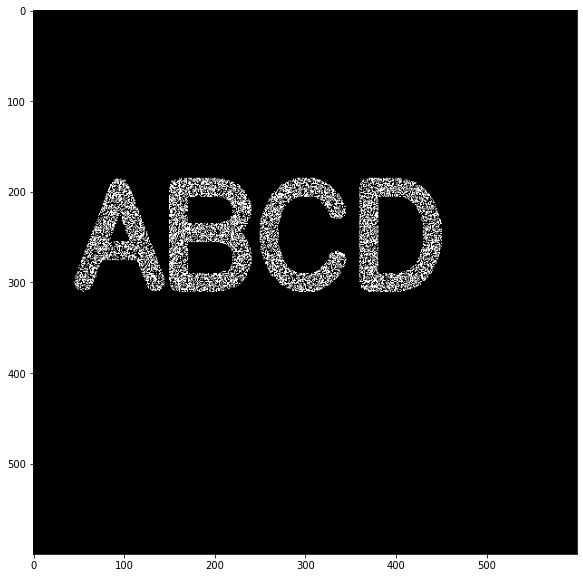

In [32]:
black_noise = np.random.randint(low=0, high=2, size=(600,600))
black_noise *= -255
fg_noise = black_noise + img
fg_noise[fg_noise== -255] = 0
display_img(fg_noise)

## Close morphology

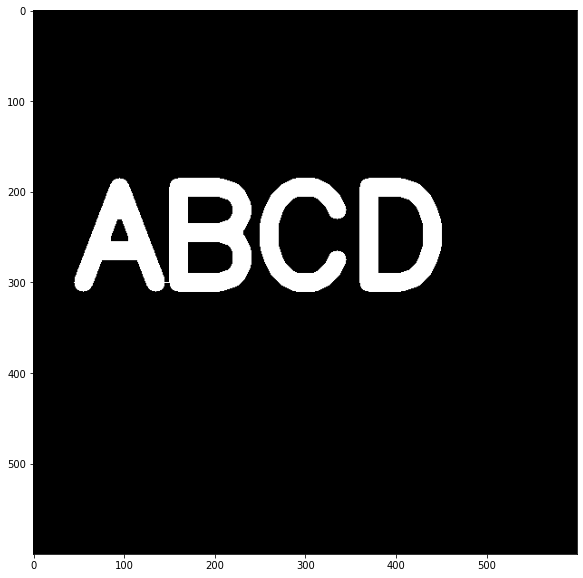

In [33]:
close = cv2.morphologyEx(img, op=cv2.MORPH_CLOSE, kernel=kernel)
display_img(close)

## Gradient

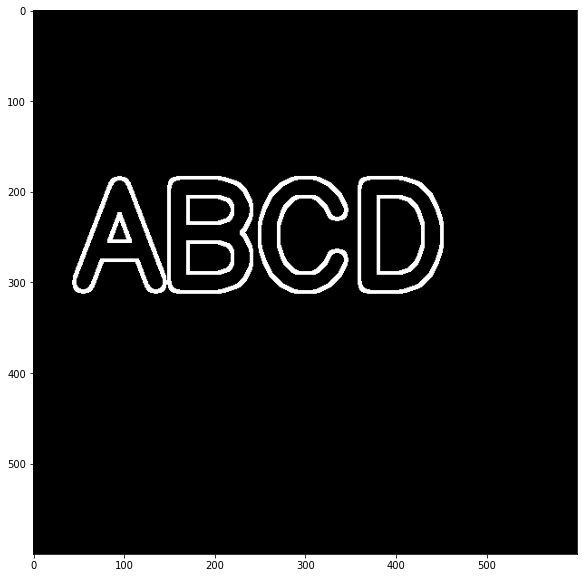

In [35]:
gradient = cv2.morphologyEx(img, op=cv2.MORPH_GRADIENT, kernel=kernel)
display_img(gradient)